In [8]:
import pandas as pd
df = pd.read_csv('C:/Users/ktang28/SandboxProj_DiamondsPredictor/diamonds.csv')

# classifier: Classification for predicting diamond clarity

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
df['cut'] = encoder.fit_transform(df['cut'])
df['color'] = encoder.fit_transform(df['color'])
df['clarity'] = encoder.fit_transform(df['clarity'])
    
X = df.drop('clarity', axis=1)
y = df['clarity']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train,y_test = train_test_split(X_normalized, y, test_size = 0.2)
X_validate, X_test, y_validate,y_test = train_test_split(X_test, y_test, test_size = 0.5)

print(len(X_train), len(X_test),len(X_validate))

43152 5394 5394


In [16]:
# train model using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.43919169447534295

In [18]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=0,splitter= 'best')
model_dt.fit(X_train, y_train)
    
y_pred = model_dt.predict(X_test)
score = model_dt.score(X_test,y_test)
print(score)

0.6166110493140526


In [20]:
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini')
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
score = model_rf.score(X_test,y_test)
print(score)

0.6952169076751946


In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
  
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 100, 100),activation='relu',solver='adam',max_iter=100,batch_size=20,random_state=0)
ann_classifier.fit(X_train, y_train)
  
y_pred = ann_classifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 57   0   1  14   0   0   0   0]
 [  0 139   0   0   2   0  30  11]
 [  0   1 870 189  42 181   3   6]
 [ 13   0 131 734   1  19   0   0]
 [  0   7  22   6 537 170  22  77]
 [  0   3 137  24 205 827   9  24]
 [  0  38   1   0  22   8 232  77]
 [  0  24   1   1  74  27  83 292]]


C:\Users\ktang28\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [61]:
score = ann_classifier.score(X_test,y_test)
print(score)

0.6837226548016314


In [71]:
type(confusion_matrix)

function

In [73]:
import numpy as np
array_cm = np.array(confusion_matrix)

In [85]:
print(array_cm)

<function confusion_matrix at 0x000001A98DD3C540>


In [83]:
type(array_cm)

numpy.ndarray

C:\Users\ktang28\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


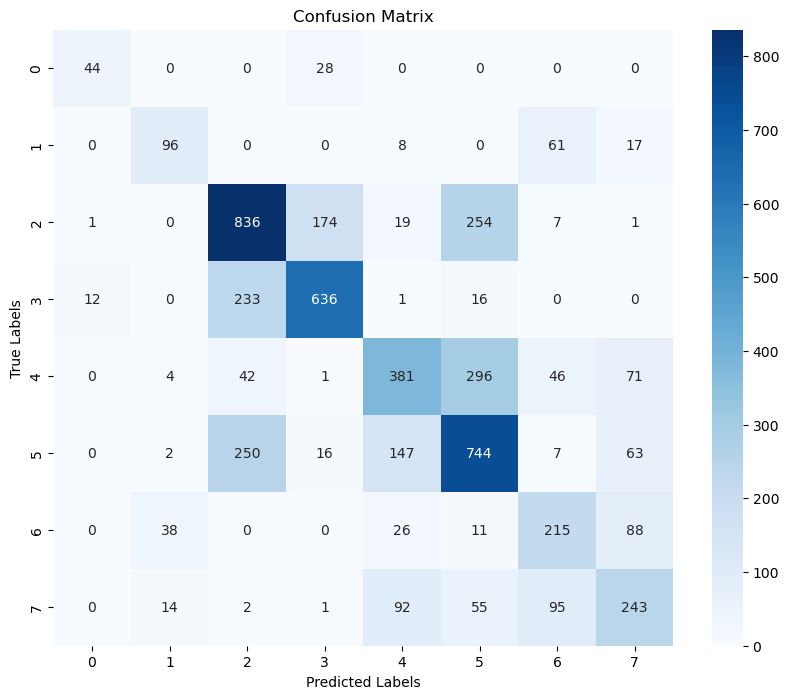

In [112]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=100, learning_rate='adaptive', learning_rate_init=0.001, solver='adam', random_state=42)
mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

disp = ConfusionMatrixDisplay(array_cm)

#disp.plot(cmap=plt.cm.Blues)
plt.show()
